## Mr Haulage 

Contained in this notebook is the code for the Techmodal Mr Haulage problem

### Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from collections import Counter
import seaborn

seaborn.set()

### Data Loading

**Note:** Before loading the data in, we converted the data to csv format, from excel worksheet. This makes loading the data in to pandas easier.

In [65]:
#Instantiate dataframe containing order data
orders_df = pd.read_csv("../data/orders.csv")

In [66]:
#Inspect data
orders_df.head()

,Order ID,Customer ID,Order Date,Order Time,Item Serial,Box Type,Delivery Region,Distance (miles),Unnamed: 8,Unnamed: 9
0,1097342,733603,22/08/2021,00:14,30351,Small,South East,70,NaN,NaN
1,1097343,405061,22/08/2021,07:08,17634,Small,Greater London,32,NaN,NaN
2,1097344,842139,22/08/2021,10:15,25598,Small,South West,190,NaN,NaN
3,1097345,211806,22/08/2021,17:05,10104,Small,South West,85,NaN,NaN
4,1097346,103222,22/08/2021,23:48,3252,Small,Greater London,43,NaN,NaN


### Exploratory Data Analysis

This section contains inital data analysis. Here we try and learn more about distributions and anything that can inform our modelling procedures.

We first would like to get an understanding about frequency of which box size occurs

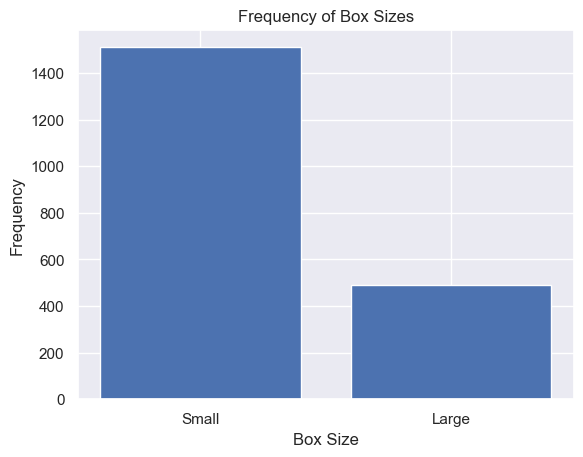

In [67]:
box_size_freq = Counter(orders_df["Box Type"])

plt.bar(box_size_freq.keys(), box_size_freq.values())

plt.xlabel('Box Size')
plt.ylabel('Frequency')
plt.title('Frequency of Box Sizes')
          
plt.show()

We observe that small boxes are shipped more than double the amount of the large boxes. In the 2000 data entries we have however, the ~400 Large boxes still are in significant number.

Next we wish to visualise the distances at which orders are typically shipped.

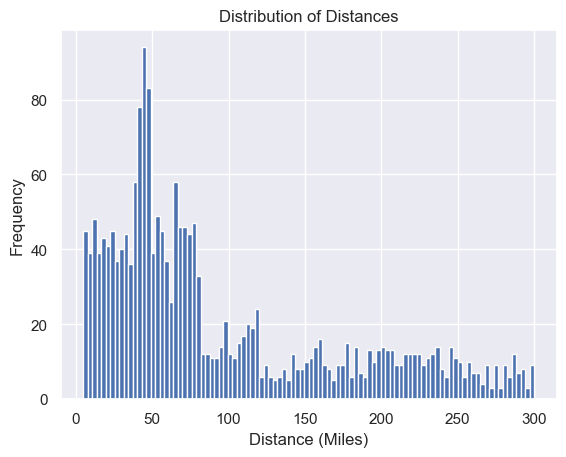

In [68]:
plt.hist(orders_df["Distance (miles)"], bins = 100)

plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')
          
plt.show()

We find that most orders are sub 75 miles, and then the distribution flattens out pretty sharply.

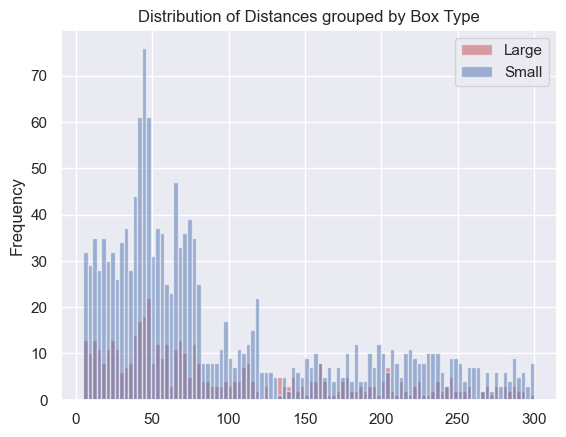

In [71]:
x1 = orders_df.loc[orders_df["Box Type"] == 'Large', 'Distance (miles)']
x2 = orders_df.loc[orders_df["Box Type"] =='Small', 'Distance (miles)']

plt.hist(x1, bins = 100, alpha = 0.5, color='r', label='Large')
plt.hist(x2, bins = 100, alpha = 0.5, color='b', label='Small')

plt.gca().set(title='Distribution of Distances grouped by Box Type', ylabel='Frequency')
plt.legend()

plt.show()

We see that there is a smiliar distribution regardless of box type, so we can say that distance will not have so much impact on our allocation.